# Final project

Our data came from Kaggle - Predicting Depression, Anxiety and Stress

There were 42 questions in the survey. The data contained within this dataset includes the answer to each question, the time it took to answer each question and the question's position in the survey.

Each of the 42 questions is scored on a 4-point scale ranging from 0 (“Did not apply to me at all”) to 3 (“Applied to me very much, or most of the time”). Scores for Depression, Anxiety and Stress are calculated by summing the scores for the relevant items: Depression: 3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42 Anxiety: 2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41 Stress: 1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39

Severites of depression, anxiety and stress are categorized to:
-	0 - Normal
-	1 - Mild
-	2 - Moderate
-	3 - Severe
-	4 - Extremely severe

Meaning | Depression | Anxiety | Stress
:---|:---|:---|:---
Normal | 0-9 | 0-7 | 0-14
Mild | 10-13 | 8-9 | 15-18
Moderate | 14-20 | 10-14 | 19-25
Severe | 21-27 | 15-19 | 26-33
Extremely severe | 28+ | 20+ | 34+

The data gathered on each survey participant:

Field | what the choices were with meaning
:---|:---
education | "How much education have you completed?", 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree
urban | "What type of area did you live when you were a child?", 1=Rural (country side), 2=Suburban, 3=Urban (town, city)
gender | "What is your gender?", 1=Male, 2=Female, 3=Other
engnat | "Is English your native language?", 1=Yes, 2=No
age | "How many years old are you?"
hand | "What hand do you use to write with?", 1=Right, 2=Left, 3=Both
religion | "What is your religion?", 1=Agnostic, 2=Atheist, 3=Buddhist, 4=Christian (Catholic), 5=Christian (Mormon), 6=Christian (Protestant), 7=Christian (Other), 8=Hindu, 9=Jewish, 10=Muslim, 11=Sikh, 12=Other
orientation | "What is your sexual orientation?", 1=Heterosexual, 2=Bisexual, 3=Homosexual, 4=Asexual, 5=Other
race | "What is your race?", 10=Asian, 20=Arab, 30=Black, 40=Indigenous Australian, 50=Native American, 60=White, 70=Other
voted | "Have you voted in a national election in the past year?", 1=Yes, 2=No
married | "What is your marital status?", 1=Never married, 2=Currently married, 3=Previously married
familysize | "Including you, how many children did your mother have?"
major | "If you attended a university, what was your major (e.g. "psychology", "English", "civil engineering")?"

The following values were derived from technical information:
- country - ISO country code of where the user connected from
- screensize 1=device with small screen (phone, etc), 2=device with big screen (laptop, desktop, etc)
- uniquenetworklocation 1=only one survey from user's specific network in dataset, 2=multiple surveys submitted from the network of this user (2 does not necessarily imply duplicate records for an individual, as it could be different students at a single school or different memebers of the same household; and even if 1 there still could be duplicate records from a single individual e.g. if they took it once on their wifi and once on their phone)
- source how the user found the test, 1=from the front page of the site hosting the survey, 2=from google, 0=other or unknown

In [1]:
# import needed libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the csv in that was downloaded from Kaggle
df = pd.read_csv('data.csv', sep=r'\t', engine='python')
df.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,None
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,None
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,None
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


Check some of the data to see what we have to work with

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Columns: 172 entries, Q1A to major
dtypes: int64(170), object(2)
memory usage: 52.2+ MB


In [4]:
df.columns

Index(['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A',
       ...
       'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major'],
      dtype='object', length=172)

In [5]:
df['country'].value_counts()

MY    21605
US     8207
GB     1180
CA      978
ID      884
      ...  
UZ        1
AM        1
AF        1
IM        1
VC        1
Name: country, Length: 145, dtype: int64

In [6]:
df['major'].value_counts()

English                         1163
Psychology                      1127
Accounting                       786
Business                         756
Engineering                      751
                                ... 
creative media                     1
PPE                                1
international communication        1
Dentistry or food technology       1
computer sciece                    1
Name: major, Length: 4647, dtype: int64

Determine if there are any nulls. We will replace the null majors with "NA" and combine them later with others that indicate No Degree.

In [7]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)


major      11407
country        2
dtype: int64

In [8]:
df['major'].replace(np.NaN,"NA",inplace=True)

Double checking that the replace worked.

In [9]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)


country    2
dtype: int64

In [10]:
df['major'].value_counts()

NA                              11407
English                          1163
Psychology                       1127
Accounting                        786
Business                          756
                                ...  
creative media                      1
PPE                                 1
international communication         1
Dentistry or food technology        1
computer sciece                     1
Name: major, Length: 4648, dtype: int64

There are 4,648 different majors - need to combine them by creating a condition function based on values in the field.

In [11]:
def condition(title):
    if 'busin' in str(title).lower() or 'manage' in str(title).lower() or 'Buss' in str(title) or 'Bisness' in str(title) or 'Manag' in str(title) or 'buis' in str(title) or 'Entrepreneur' in str(title) or 'entrepr' in str(title).lower() or 'managment' in str(title).lower() or 'Buis' in str(title) or 'Busni' in str(title) or 'Mana' in str(title) or 'buss' in str(title).lower() or 'Bi' in str(title) or 'Mgt' in str(title) or 'MBA' in str(title) or 'Mgmt' in str(title) or 'MD' in str(title):
        return 'Business/Management'
    elif 'information technology' in str(title).lower() or 'IT' in str(title) or 'it' in str(title) or 'Information' in str(title):
        return 'I.T.'
    elif 'math' in str(title).lower() or 'LOGISTICS' in str(title) or 'st' in str(title).lower() or 'marh' in str(title).lower() or 'Mate' in str(title):
        return 'Mathematics'
    elif 'computer' in str(title).lower() or 'Computer' in str(title):
        return 'I.T.'
    elif 'bio' in str(title).lower() or 'Bio' in str(title) or 'Plant' in str(title) or 'plant' in str(title).lower() or 'Micro' in str(title):
        return 'Biology'
    elif 'tesl' in str(title).lower() or 'TES' in str(title) or 'Teso' in str(title) or 'Enhlish' in str(title):
        return 'English'
    elif 'account' in str(title).lower() or 'Accoun' in str(title) or 'Acc' in str(title) or 'acc' in str(title).lower() or 'Acouunt' in str(title) or 'Acvount' in str(title) or 'Count' in str(title) or 'Bookke' in str(title):
        return 'Accounting'
    elif 'CA' in str(title):
        return 'CA'
    elif 'none' in str(title).lower() or '0' in str(title) or  '_' in str(title) or '.' in str(title) or 'Nine' in str(title) or '19' in str(title) or 'NA' in str(title):
        return 'No Degree'
    elif 'nurs' in str(title).lower() or 'BSN' in str(title):
        return 'Nursing'
    elif '-' in str(title).lower() or 'NIL' in str(title):
        return 'No Degree'
    elif 'teach' in str(title).lower() or 'Lect' in str(title) or 'eet' in str(title).lower():
        return 'Teaching'
    elif 'pharma' in str(title).lower() or 'medic' in str(title).lower() or 'med' in str(title).lower() or 'hospi' in str(title).lower() or 'Mwdicine' in str(title) or 'Farmacy' in str(title) or 'Pharacology' in str(title) or 'farmasi' in str(title).lower() or 'Farmasy' in str(title) or 'midwi' in str(title).lower() or 'Pathol' in str(title) or 'epide' in str(title).lower() or 'viro' in str(title).lower() or 'clinic' in str(title).lower():
        return 'Pharmacy/Medical'
    elif 'doctor' in str(title).lower() or  'MBBS' in str(title) or 'Mbbs' in str(title) or 'Surge' in str(title) or 'surge' in str(title) or 'mbbs' in str(title).lower()or 'dermat' in str(title).lower() or 'Podiat' in str(title) :
        return 'Doctor'
    elif 'no' in str(title).lower() or 'Undec' in str(title) or 'Idk' in str(title) or 'idk' in str(title).lower() or 'Hahaha' in str(title) or 'never' in str(title).lower() or 'T' in str(title) or 'Good' in str(title):
        return 'No Degree'
    elif 'film' in str(title).lower() or 'Cinema' in str(title) or 'fil' in str(title).lower() or 'Adver' in str(title) or 'adver' in str(title) or 'Act' in str(title) or 'Enter' in str(title) or 'digital' in str(title).lower() or 'cinema' in str(title).lower() or 'Video' in str(title) or 'Direct' in str(title) or 'Theat' in str(title) or 'Radio' in str(title) or 'theat' in str(title).lower() or 'drama' in str(title).lower():
        return 'Media'
    elif 'international' in str(title).lower() or 'Internatianal' in str(title):
        return 'International Relations'
    elif 'human' in str(title).lower() or 'hr' in str(title).lower() or 'Hs' in str(title) or 'Hm' in str(title) or 'Humam' in str(title):
        return 'Human Resources'
    elif 'art' in str(title).lower() or 'Painting' in str(title) or 'Drawing' in str(title) or 'ba' in str(title) or 'Printing' in str(title) or 'las' in str(title).lower() or 'Ma' in str(title) or 'paint' in str(title).lower() or 'creative' in str(title).lower() or 'AA' in str(title) or 'BA' in str(title) or 'Sculp' in str(title) or 'Writing' in str(title) or 'writing' in str(title).lower() or 'Screenwrit' in str(title) or 'Author' in str(title):
        return 'Creative Writing/Arts'
    elif 'islam' in str(title).lower() or 'Muamalat' in str(title) or 'Quran' in str(title) or 'Halal' in str(title) or 'Usul' in str(title) or 'Zakat' in str(title) or 'usul' in str(title).lower():
        return 'Islamic Studies'
    elif 'physio' in str(title).lower() or 'fis' in str(title).lower():
        return 'Physiotherapy'
    elif 'socio' in str(title).lower() or 'social' in str(title).lower() or 'soical' in str(title).lower() or 'Sis' in str(title) or 'Sosio' in str(title) or 'Sicio' in str(title) or 'sosiality' in str(title).lower():
        return 'Sociology'
    elif 'bank' in str(title).lower():
        return 'Banking'
    elif 'Palae' in str(title) or 'Museo' in str(title):
        return 'History'
    elif 'agri' in str(title).lower():
        return 'Agriculture'
    elif 'Market' in str(title) or 'Finan' in str(title) or 'finance' in str(title).lower() or 'MARKETING' in str(title) or 'market' in str(title).lower() or 'retail' in str(title).lower() or 'CMP' in str(title) or 'Merket' in str(title):
        return 'Marketing/Finance'
    elif 'counsel' in str(title).lower() or 'cauns' in str(title) or 'Kaunseling' in str(title) or 'kaunseling' in str(title) or 'Caunsel' in str(title) or 'Counsel' in str(title) or 'Cousel' in str(title) or 'Crisis' in str(title):
        return 'Counselling'
    elif 'programming' in str(title).lower() or 'coding' in str(title).lower() or 'Ibm' in str(title) or 'ceit' in str(title) or 'Hacking' in str(title):
        return 'I.T.'
    elif 'civil' in str(title).lower() or 'comp' in str(title).lower() or 'Mechanical' in str(title) or 'Electrical' in str(title) or 'Mechatronics' in str(title) or 'Eee' in str(title) or 'cs' in str(title).lower() or 'mecha' in str(title) or 'Chemical' in str(title) or 'chemical' in str(title) or 'tech' in str(title) or 'ec' in str(title).lower() or 'egineering' in str(title).lower() or 'manufacturing' in str(title).lower():
        return 'Engineering'
    elif 'ict' in str(title).lower() or 'developer' in str(title).lower() or 'I.T' in str(title) or 'CAE&D' in str(title) or 'It' in str(title):
        return 'I.T.'
    elif 'commu' in str(title).lower() or 'comm' in str(title).lower() or 'com' in str(title).lower() or 'Conmunication' in str(title):
        return 'Communications'
    elif 'administration' in str(title).lower() or 'admin' in str(title).lower():
        return 'Administration'
    elif 'psycho' in str(title).lower() or 'psy' in str(title).lower() or 'Clinical osychology' in str(title) or 'hschology' in str(title) or 'Pysch' in str(title) or 'pys' in str(title).lower() or 'Pych' in str(title) or 'pscy' in str(title) or 'payc' in str(title).lower() or 'Phyc' in str(title) or 'psicologia' in str(title) or 'Phsychology' in str(title) or 'Phichology' in str(title) or 'psuchology' in str(title) or 'Pschology' in str(title) or 'psikologi' in str(title).lower():
        return 'Psychology'
    elif 'english' in str(title).lower() or 'Elglish' in str(title) or 'esl' in str(title).lower() or 'Emg' in str(title) or 'emglisj' in str(title).lower():
        return 'English'
    elif 'law' in str(title).lower() or 'BBA' in str(title) or 'llb' in str(title) or 'lew' in str(title).lower() or 'kaw' in str(title).lower() or 'enforcement' in str(title).lower() or 'Kaw' in str(title):
        return 'Law'
    elif 'engineering' in str(title).lower() or 'engi' in str(title).lower() or 'eng' in str(title).lower() or 'Software' in str(title) or 'soft' in str(title).lower() or 'mechanical' in str(title).lower() or 'Egineeering' in  str(title) or 'electronic' in str(title).lower() or 'CE' in str(title) or 'mech' in str(title).lower() or 'Ciclvil' in str(title) or 'Eggineering' in str(title) or 'Tech' in str(title) or 'Teol' in str(title) or 'EEE' in str(title) or 'PE' in str(title):
        return 'Engineering'
    elif 'architecture' in str(title).lower() or 'aechitecture' in str(title).lower() or 'archirecture' in str(title).lower() or 'architect' in str(title).lower() or 'Arsitechture' in str(title) or 'Building' in str(title) or 'building' in str(title).lower() or 'Arc' in str(title) or 'builder' in str(title).lower():
        return 'Architecture'
    elif 'design' in str(title).lower() or 'Desig' in str(title) or 'Dssign' in str(title):
        return 'Designer'
    elif 'science' in str(title).lower() or 'Sceince' in str(title) or 'Sci' in str(title) or 'sciene' in str(title) or 'BS' in str(title):
        return 'Pure Sciences'
    elif 'physics' in str(title).lower() or 'Phsyics' in str(title) or 'EMC' in str(title) or 'Physic' in str(title) or 'physi' in str(title):
        return 'Physics'
    elif 'chemistry' in str(title).lower() or 'CIS' in str(title) or 'Chem' in str(title):
        return 'Pure Sciences'
    elif 'french' in str(title).lower() or 'Fr' in str(title) or 'GERMAN' in str(title) or 'german' in str(title).lower() or 'KOREAN' in str(title) or 'Korea' in str(title) or 'Spanish' in str(title) or 'greek' in str(title).lower() or 'Greek' in str(title) or 'usa' in str(title).lower() or 'arabic' in str(title).lower() or 'Arabic' in str(title) or 'Afrikaans' in str(title) or 'Danish' in str(title) or 'Dutch' in str(title): 
        return 'Foreign Studies'
    elif 'Japanese' in str(title) or 'portuguese' in str(title).lower() or 'Russian' in str(title) or 'Interpr' in str(title) or 'interpr' in str(title).lower() or 'transla' in str(title).lower():
        return 'Foreign Studies'
    elif 'religi' in str(title).lower() or 'Relegion' in str(title) or 'Rel' in str(title) or 'Hukum' in str(title) or 'Sains' in str(title) or 'theology' in str(title).lower():
        return 'Religious Studies'
    elif title=='&#1593;&#1604;&#1605; &#1606;&#1601;&#1587;' or title=='&#22810;&#23186;&#39636;&#35373;&#35336;' or title=='nil' or title=='drop out' or title=='&#1055;&#1089;&#1080;&#1093;&#1086;&#1083;&#1' or title=='75' or title=='Secondary education' or title=='Thiê&#769;t kê&#769; &#273;ô&#768; ho&#803;a' or title=='18' or title=='ongoing' or title=='&#28888;&#22521;' or title=='lol' or title=='In college currently' or title=='secondary education' or title=='Dropped out' or title=='na' or title=='didnt attend' or title=='im going on the next year. ' or title=='&#304;lahiyat' or title=='lmfao, im 15' or title=='Elem Ed' or title=='yes' or title=='N/a' or title=='/' or title=='???' or title=='cocaine 101' or title=='doesnt matter' or title== 'oooo' or title=='G' or title=='Yes' or title=='Na' or title=='Na 'or title=='Want sure':
        return 'No Degree'
    elif 'Music' in str(title) or 'Dance' in str(title) or 'danc' in str(title).lower() or 'Vocational' in str(title) or 'Muisc' in str(title) or 'music' in str(title).lower() or 'Performance' in str(title) or 'singer' in str(title).lower():
        return 'Music/Dance'
    elif 'pol' in str(title).lower() or 'Govern' in str(title) or 'Right' in str(title):
        return 'Politics'
    elif 'photo' in str(title).lower() or 'Foto' in str(title) or 'Photo' in str(title):
        return 'Photography'
    elif 'Television' in str(title) or 'telev' in str(title).lower():
        return 'Television'
    elif 'bahasa' in str(title).lower() or 'Bahasa' in str(title) or 'Malay' in str(title) or 'malay' in str(title).lower():
        return 'Foreign Studies'
    elif 'Urban' in str(title) or 'Town' in str(title) or 'town' in str(title).lower() or 'planning' in str(title) or 'Plann' in str(title) or 'development' in str(title):
        return 'Economic Development'
    elif 'Public' in str(title) or 'public' in str(title).lower():
        return 'Public Relations'
    elif 'philosophy' in str(title).lower() or 'Phil' in str(title) or 'philos' in str(title).lower() or 'Filo' in str(title) or 'Phylosophy' in str(title):
        return 'Philosophy'
    elif 'Actua' in str(title):
        return 'Acturial Studies'
    elif 'DENTALWORKS' in str(title) or 'dental' in str(title) or 'Dental' in str(title) or 'Odont' in str(title):
        return 'Dentist'
    elif 'beaut' in str(title).lower() or 'Fashion' in str(title) or 'make' in str(title) or 'fashion' in str(title).lower() or 'hair' in str(title).lower() or 'cosmet' in str(title).lower():
        return 'Fashion'
    elif 'Health' in str(title) or 'health' in str(title).lower() or 'wellness' in str(title).lower() or 'Healtcare' in str(title):
        return 'Healthcare'
    elif 'Language' in str(title) or 'lang' in str(title).lower() or 'Laq' in str(title):
        return 'Languages'
    elif 'cook' in str(title).lower() or 'bakery' in str(title).lower() or 'Bak' in str(title) or 'CULINARY' in str(title) or 'Food' in str(title) or 'food' in str(title) or 'chef' in str(title).lower() or 'Cul' in str(title) or 'Patiss' in str(title) or 'culi' in str(title).lower():
        return 'Cooking'
    elif 'Hotel' in str(title) or 'hotel' in str(title).lower() or 'food service' in str(title) or 'cater' in str(title).lower():
        return 'Hotel Management'
    elif 'therapy' in str(title).lower() or 'ot' in str(title).lower() or 'theraphy' in str(title):
        return 'Therapeutical Studies'
    elif 'veter' in str(title).lower() or 'Veter' in str(title) or 'Vet' in str(title) or 'Wildlife' in str(title):
        return 'Veterinary'
    elif 'Survey' in str(title) or 'survey' in str(title) or 'serveyors' in str(title).lower() or 'Qs' in str(title) or 'SURVEYING' in str(title) or 'QS' in str(title) or 'Surver' in str(title):
        return 'Surveyor Studies'
    elif 'Aircraft' in str(title) or 'aircraft' in str(title).lower() or 'aircr' in str(title).lower() or 'aviation' in str(title).lower() or 'Aero' in str(title) or 'navigation' in str(title).lower():
        return 'Aircraft'
    elif 'environment' in str(title).lower() or 'Environment' in str(title) or 'envi' in str(title).lower():
        return 'Landscaping'
    elif 'Syariah' in str(title) or 'syariah' in str(title):
        return 'Foreign Studies'
    elif 'judicial' in str(title).lower() or 'juri' in str(title).lower() or 'legal' in str(title).lower():
        return 'Law'
    elif 'Liter' in str(title) or 'literature' in str(title) or 'litt' in str(title).lower():
        return 'Literature'
    elif 'child' in str(title).lower() or 'Child' in str(title) or 'Preschool' in str(title) or 'Youth' in str(title):
        return 'Child Education'
    elif 'Tour' in str(title) or 'tour'  in str(title).lower():
        return 'Tourism'
    elif 'Gam' in str(title) or 'game' in str(title).lower():
        return 'I.T.'
    elif 'education' in str(title).lower() or 'Education' in str(title) or 'ed' in str(title).lower() or 'acad' in str(title) or 'Dploma' in str(title) or 'Bach' in str(title) or 'College' in str(title) or 'harvard' in str(title).lower():
        return 'B.Ed or M.Ed'
    elif 'Sport' in str(title) or 'sport' in str(title).lower():
        return 'Sports'
    elif 'Petro' in str(title):
        return 'Petroleum'
    elif 'Journ' in str(title) or 'jour' in str(title).lower() or 'Joun' in str(title) or 'Jurn' in str(title):
        return 'Journalism'
    elif 'Mandarin' in str(title) or 'Chinese' in str(title):
        return 'Foreign Studies'
    elif 'Electrician' in str(title):
        return 'Skilled Trade'
    elif 'Network' in str(title) or 'network' in str(title).lower():
        return 'Networking'
    elif 'geo' in str(title).lower() or 'GEO' in str(title) or 'Geo' in str(title):
        return 'Geography'
    elif 'Librarian' in str(title) or 'lib' in str(title).lower():
        return 'Librarian'
    elif 'Mission' in str(title) or 'mission' in str(title).lower():
        return 'Religious Studies'
    elif 'Forensic' in str(title) or 'foren' in str(title).lower() or 'Crime' in str(title) or 'crim' in str(title).lower():
        return 'Law'
    elif 'Animation' in str(title) or 'animation' in str(title).lower() or 'imag' in str(title) or 'graphic' in str(title) or 'Graphic' in str(title) or 'Cretive' in str(title):
        return 'Animations'
    elif 'aqua' in str(title).lower() or 'Aqu' in str(title):
        return 'Aquaculture'
    elif 'soldier' in str(title).lower() or 'lwa' in str(title).lower() or 'defence' in str(title):
        return 'Skilled Trade'
    elif 'Kinesi' in str(title) or 'kines' in str(title).lower() or 'hod' in str(title):
        return 'Human Kinetics'
    elif 'Horti' in str(title) or 'horti' in str(title) or 'Landscape' in str(title) or 'land' in str(title) or 'Mining' in str(title) or 'Corrosion' in str(title):
        return 'Landscaping'
    elif 'commerce' in str(title).lower() or 'Coome' in str(title) or 'event' in str(title).lower() or 'Event' in str(title):
        return 'Office Skills'
    elif 'Speech' in str(title) or 'speech' in str(title).lower():
        return 'Speech Pathology'
    elif 'SECRET' in str(title) or 'secret' in str(title).lower():
        return 'Secretary'
    elif 'Animals' in str(title) or 'animal' in str(title).lower() or 'Pet' in str(title):
        return 'Veterinary'
    elif 'radiology' in str(title).lower() or 'Radiography' in str(title) or 'radiograpghy' in str(title).lower() or 'Radiation' in str(title) or 'radiography' in str(title):
        return 'Pharmacy/Medical'
    elif 'nutrition' in str(title).lower() or 'Nutrition' in str(title):
        return 'Nutritionist'
    elif 'Audit' in str(title) or 'audit' in str(title).lower():
        return 'Auditing'
    elif 'Neuro' in str(title) or 'neuroligy' in str(title).lower():
        return 'Pharmacy/Medical'
    elif 'Anato' in str(title) or 'anat' in str(title).lower():
        return 'Pharmacy/Medical'
    elif 'trade' in str(title).lower():
        return 'Trading'
    elif 'audio' in str(title).lower() or 'Audio' in str(title):
        return 'Audiology'
    elif 'insurance' in str(title).lower() or 'Insurance' in str(title):
        return 'Insurance'
    elif 'archaeology' in str(title).lower() or 'archaeology' in str(title).lower() or 'archeology' in str(title).lower() or 'treasury' in str(title):
        return 'Archeology'
    elif 'SERV'in str(title) or 'service' in str(title).lower():
        return 'Skilled Trade'
    elif 'valuat' in str(title).lower() or 'valuer' in str(title).lower():
        return 'Registered Valuer'
    elif 'skil' in str(title).lower() or 'Skill' in str(title) or 'Professional' in str(title) or 'practical' in str(title).lower():
        return 'Skilled Trade'
    elif 'virology' in str(title):
        return 'Biology'
    elif 'lab' in str(title).lower() or 'Lab' in str(title) or 'MLT' in str(title):
        return 'Pharmacy/Medical'
    elif 'GENERAL' in str(title) or 'General' in str(title) or 'general' in str(title).lower():
        return 'General'
    elif 'Opto' in str(title) or 'opto' in str(title).lower() or 'Ophth' in str(title):
        return 'Optometry'
    elif 'Zoo' in str(title) or 'zoo' in str(title).lower():
        return 'Zoology'
    elif 'office' in str(title).lower() or 'Office' in str(title):
        return 'Office Skills'
    elif 'found' in str(title).lower() or 'Found' in str(title):
        return 'General'
    elif 'real estate' in str(title).lower() or 'property' in str(title).lower():
        return 'Realty'
    elif 'Meteorology' in str(title) or 'Metrology' in str(title):
        return 'Pure Sciences'
    elif 'operations' in str(title).lower() or 'Operation' in str(title):
        return 'Office Skills'
    elif 'Merchandising' in str(title) or 'merchand' in str(title).lower():
        return 'Fashion'
    elif 'Nature' in str(title) or 'natur' in str(title).lower():
        return 'Landscaping'
    elif title=='a level ' or title==' ' or title=='a level':
        return 'No Degree'
    elif 'Corporate' in str(title) or 'corporate' in str(title).lower():
        return 'Office Skills'
    elif 'Behaviour' in str(title) or 'Behavior' in str(title) or 'Organizational Behaviour' in str(title) or 'Organisation' in str(title) or 'organi' in str(title).lower():
        return 'Behavioral Analysis'
    elif 'publish' in str(title).lower():
        return 'Publishing'
    elif 'Dietetic' in str(title) or 'genetic' in str(title).lower() or 'Genetic' in str(title):
        return 'Pharmacy/Medical'
    elif 'Production' in str(title) or 'manufacturing' in str(title).lower():
        return 'Office Skills'
    elif 'Welding' in str(title) or 'hvac' in str(title).lower() or 'maint' in str(title).lower():
        return 'Skilled Trade'
    elif 'Geron' in str(title):
        return 'Pharmacy/Medical'
    elif 'Research' in str(title) or 'Ph D' in str(title):
        return 'Pharmacy/Medical'
    elif 'Cabin' in str(title):
        return 'Tourism'
    elif 'Charge' in str(title) or 'Safety' in str(title) or 'safety' in str(title).lower():
        return 'Skilled Trade'
    elif 'Leader' in str(title) or 'Product Dev' in str(title) or 'Supply' in str(title):
        return 'Office Skills'
    else:
        return title

df['major'] = df['major'].apply(condition)

Once the updates have been made, checking to see how many different majors are left - now at 80.

In [12]:
df['major'].value_counts()

No Degree              12703
Engineering             3866
Business/Management     3220
I.T.                    2624
Mathematics             2331
                       ...  
Registered Valuer          2
Gis                        2
Trading                    1
Kiin                       1
IR                         1
Name: major, Length: 80, dtype: int64

38 rows have less than 10 with that major. Dropped them

In [13]:
major_ct = df.groupby('major').filter(lambda x: (x['major'].count()<10).any())
major_ct

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
4755,4,30,5529,2,28,6521,3,26,5233,2,...,1,2,1,10,1,10,2,1,4,Archeology
6960,3,5,3131,2,14,4930,4,35,2874,3,...,1,1,3,4,2,60,2,1,1,Audiology
8226,2,36,4545,2,1,20411,1,42,5305,1,...,1,1,1,10,0,10,2,1,4,Audiology
9111,2,39,15578,2,36,2771,2,2,4923,1,...,1,1,1,8,1,10,2,1,2,Petroleum
9286,2,25,3419,1,10,3274,4,4,4885,1,...,1,1,2,10,2,10,2,1,5,Realty
10103,3,41,2520,4,12,5040,3,16,4032,1,...,2,1,1,4,1,60,1,1,2,Archeology
11301,1,39,3228,2,26,4816,2,35,6335,1,...,2,1,1,3,1,70,2,1,1,Trading
13431,2,35,2862,2,31,2316,1,3,3117,1,...,2,1,1,1,1,60,2,3,3,Audiology
13542,2,17,3455,1,15,1933,1,37,2971,1,...,2,1,1,6,1,60,2,1,3,History
13595,2,26,9265,1,13,7985,2,39,6114,2,...,1,1,1,6,1,60,2,1,1,History


In [14]:
#dropping those with fewer than 10 with the same major

df=df.groupby('major').filter(lambda x: (x['major'].count()>9).any())


In [15]:
df['major'].value_counts()

No Degree              12703
Engineering             3866
Business/Management     3220
I.T.                    2624
Mathematics             2331
                       ...  
General                   13
Human Kinetics            13
Insurance                 13
Librarian                 12
Aquaculture               10
Name: major, Length: 68, dtype: int64

In [16]:
print('Shape',df.shape)

Shape (39737, 172)


In [17]:
#df['major'].replace(np.NaN,"NA",inplace=True)
df.columns = df.columns.str.replace('TIPI', 'tipi')

In [20]:
df.columns

Index(['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A',
       ...
       'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major'],
      dtype='object', length=172)

There are 172 columns. Dropping the question position, question time, and validity columns that have a capital I in the column name. 

In [21]:
position = [i for i in df.iloc[:,0:172] if  'I' in i]
time = [i for i in df.iloc[:,0:172] if  'E' in i]
VCL = [i for i in df.iloc[:,0:172] if 'VCL' in i]

In [22]:
df.drop(position,axis=1,inplace=True)
df.drop(time,axis=1,inplace=True)
df.drop(VCL,axis=1,inplace=True)

Additional fields to drop are elapsed time for the intro, test, and survey as well as screensize, network location and source.

In [23]:
df.drop(['introelapse', 'testelapse', 'surveyelapse'],axis=1,inplace=True)
df.drop(['screensize', 'uniquenetworklocation', 'source'],axis=1,inplace=True)

Now at 66 columns

In [25]:
df.shape

(39737, 66)

Depression, anxiety and stress interpret to certain questions. Adding columns to the dataframe to hold the total score of the questions for each group as well as where that total places the participant for the level of depression, anxiety or stress.

In [26]:
# Specific questions are used to determine level of depression, anxiety or stress. 
DASS_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}

# The bins indicate the level of depression, anxiety and stress
DASS_bins = {'Depression': [(0, 10), (10, 14), (14, 21), (21, 28)],
             'Anxiety': [(0, 8), (8, 10), (10, 15), (15, 20)],
             'Stress': [(0, 15), (15, 19), (19, 26), (26, 34)]}
             
# add columns to the dataframe to hold the levels (cat) and the scores. The level could have been calculated later but chose
# to include it here.
for name, keys in DASS_keys.items():
    # Subtract one to match definition of DASS score in source
    df[name] = (df.filter(regex='Q(%s)A' % '|'.join(map(str, keys))) - 1).sum(axis=1)
    
    bins = DASS_bins[name]
    bins.append( (DASS_bins[name][-1][-1], df[name].max() + 1) )
    bins = pd.IntervalIndex.from_tuples(bins, closed='left')
    df[name + '_cat'] = np.arange(len(bins))[pd.cut(df[name], bins=bins).cat.codes]
    
dass = df[DASS_keys.keys()]
dass_cat = df[[k + '_cat' for k in DASS_keys.keys()]]

df[[k + '_cat' for k in DASS_keys.keys()] + list(DASS_keys.keys())].head()

,Depression_cat,Anxiety_cat,Stress_cat,Depression,Anxiety,Stress
0,3,4,4,27,34,40
1,3,3,3,24,17,27
2,4,2,1,39,12,17
3,2,3,1,16,17,16
4,4,4,3,32,40,29


In [27]:
print('Shape',df.shape)
print('Attributes',df.columns)

Shape (39737, 72)
Attributes Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'country', 'tipi1', 'tipi2',
       'tipi3', 'tipi4', 'tipi5', 'tipi6', 'tipi7', 'tipi8', 'tipi9', 'tipi10',
       'education', 'urban', 'gender', 'engnat', 'age', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major',
       'Depression', 'Depression_cat', 'Anxiety', 'Anxiety_cat', 'Stress',
       'Stress_cat'],
      dtype='object')


In [28]:
# Save df here as a csv for modeling
df.to_csv("dass_modeling.csv", index=False)

# Continue with cleaning from this point on for visualization and analysis

In [29]:
# Now that the scores and levels have been added, the questions can be dropped.
question = [i for i in df.iloc[:,0:71] if  'Q' in i]
df=df.drop(question,axis=1)

In [30]:
print('Shape',df.shape)
print('Attributes',df.columns)

Shape (39737, 30)
Attributes Index(['country', 'tipi1', 'tipi2', 'tipi3', 'tipi4', 'tipi5', 'tipi6',
       'tipi7', 'tipi8', 'tipi9', 'tipi10', 'education', 'urban', 'gender',
       'engnat', 'age', 'hand', 'religion', 'orientation', 'race', 'voted',
       'married', 'familysize', 'major', 'Depression', 'Depression_cat',
       'Anxiety', 'Anxiety_cat', 'Stress', 'Stress_cat'],
      dtype='object')


Determined there were a number of countries showing as None (this is where the survey was taken from). 

In [31]:
df['country'].replace("NONE",np.NaN,inplace=True)

In [32]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

country    541
dtype: int64

There are 541 rows without a country 

## run some visualizations/correlation to look at data so far

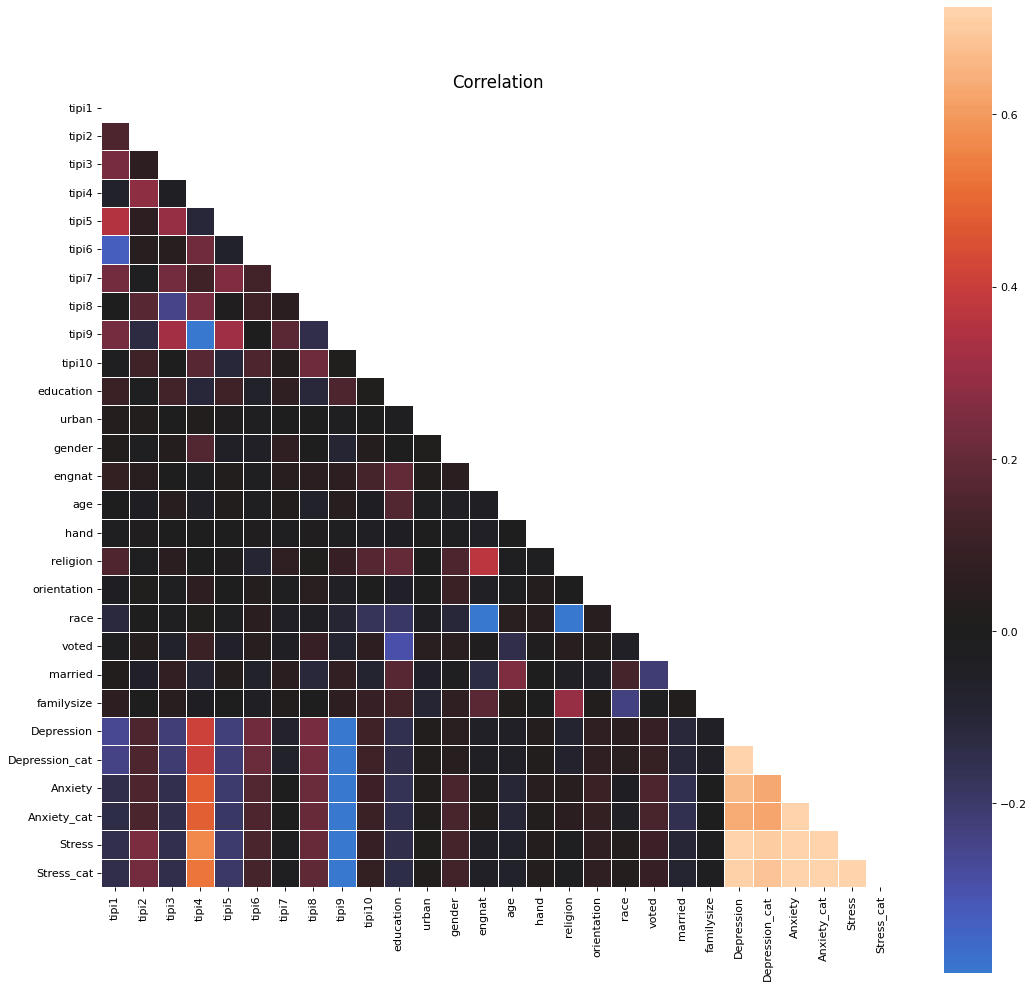

In [33]:
plt.figure(figsize=(16,16),dpi=80)
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, robust=True, center=0, square=True, linewidths=.5)
plt.title('Correlation', fontsize=15)
plt.show()

Change the value of the category to the wording to make visualizations more presentable.

In [34]:
def condition(x):
    if x==0:
        return '0 Normal'
    if x==1:
        return '1 Mild'
    if x==2:
        return '2 Moderate'
    if x==3:
        return '3 Severe'
    if x==4:
        return '4 Extremely Severe'
    else:
        return x

df['dep_cond']=df['Depression_cat'].apply(condition)
df['anx_cond']=df['Anxiety_cat'].apply(condition)
df['str_cond']=df['Stress_cat'].apply(condition)

In [35]:
df.head()

,country,tipi1,tipi2,tipi3,tipi4,tipi5,tipi6,tipi7,tipi8,tipi9,...,major,Depression,Depression_cat,Anxiety,Anxiety_cat,Stress,Stress_cat,dep_cond,anx_cond,str_cond
0,IN,1,5,7,7,7,7,7,5,1,...,No Degree,27,3,34,4,40,4,3 Severe,4 Extremely Severe,4 Extremely Severe
1,US,6,5,4,7,5,4,7,7,1,...,No Degree,24,3,17,3,27,3,3 Severe,3 Severe,3 Severe
2,PL,2,5,2,2,5,6,5,5,3,...,No Degree,39,4,12,2,17,1,4 Extremely Severe,2 Moderate,1 Mild
3,US,1,1,7,4,6,4,6,1,6,...,Biology,16,2,17,3,16,1,2 Moderate,3 Severe,1 Mild
4,MY,2,5,3,6,5,5,5,6,3,...,Psychology,32,4,40,4,29,3,4 Extremely Severe,4 Extremely Severe,3 Severe


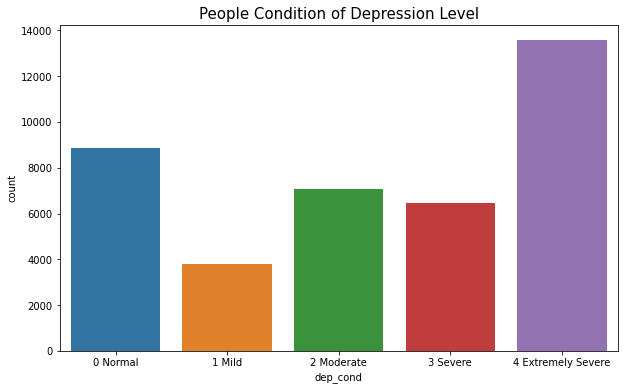

In [36]:
plt.figure(figsize=(10,6))
#dt=df.sort_values('dep_cond').dep_cond
sns.countplot(df.sort_values('dep_cond').dep_cond)

plt.title('People Condition of Depression Level',fontsize=15)
plt.show()

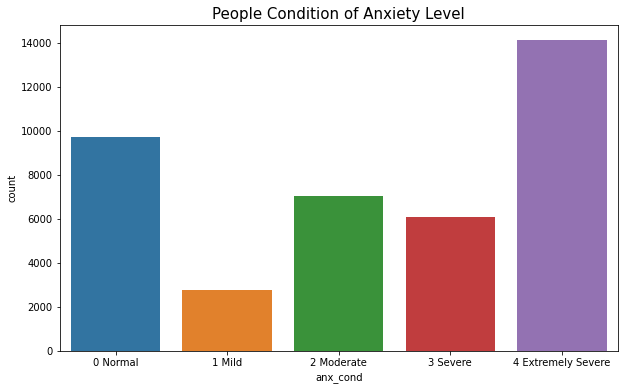

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(df.sort_values('anx_cond').anx_cond)
plt.title('People Condition of Anxiety Level',fontsize=15)
plt.show()

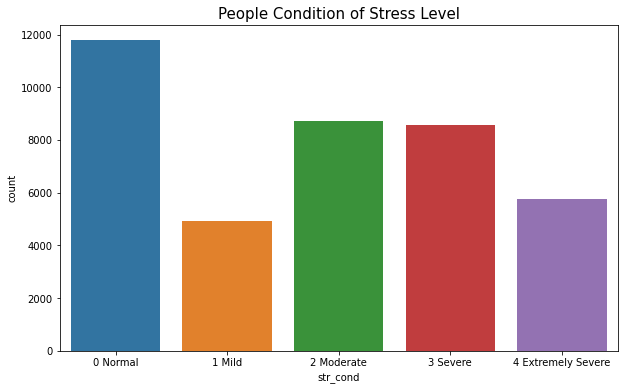

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(df.sort_values('str_cond').str_cond)
plt.title('People Condition of Stress Level',fontsize=15)
plt.show()

Have not checked the other fields such as age and family size - using boxplots to see outliers

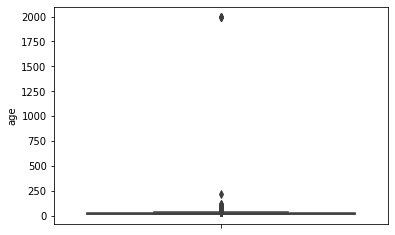

In [39]:
sns.boxplot(data=df,y='age')
plt.show()

For those ages over 95, replace them with the mean of the age

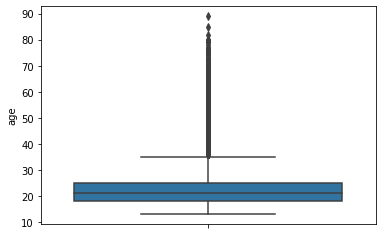

In [40]:
df.loc[df['age'] > 95, 'age'] = df['age'].mean()
sns.boxplot(data=df,y='age')
plt.show()

In [41]:
df.shape

(39737, 33)

Create age groups - age groups will be used as a domain table in the database.

In [42]:
age_group = ['0-20','20-24', '25-29', '30-34', '35-39', '40-49', '50-59', '60 & over']
def age_grouping(df, string):
    """Input: df, string = age column name
       Output: df with new column age group"""
    age_group_func = [
    (df[string]<20),
     ((df[string]>=20) & (df[string]<25)),
     ((df[string]>=25) & (df[string]<30)),
     ((df[string]>=30) & (df[string]<35)),
     ((df[string]>=35) & (df[string]<40)),
     ((df[string]>=40) & (df[string]<50)),
     ((df[string]>=50) & (df[string]<60)),
     (df[string]>=60)
    ]
    df.insert(df.columns.get_loc('age'), "age_group" ,np.select(age_group_func, age_group))
    return df
    
df = age_grouping(df, 'age')
df.head(5)

,country,tipi1,tipi2,tipi3,tipi4,tipi5,tipi6,tipi7,tipi8,tipi9,...,major,Depression,Depression_cat,Anxiety,Anxiety_cat,Stress,Stress_cat,dep_cond,anx_cond,str_cond
0,IN,1,5,7,7,7,7,7,5,1,...,No Degree,27,3,34,4,40,4,3 Severe,4 Extremely Severe,4 Extremely Severe
1,US,6,5,4,7,5,4,7,7,1,...,No Degree,24,3,17,3,27,3,3 Severe,3 Severe,3 Severe
2,PL,2,5,2,2,5,6,5,5,3,...,No Degree,39,4,12,2,17,1,4 Extremely Severe,2 Moderate,1 Mild
3,US,1,1,7,4,6,4,6,1,6,...,Biology,16,2,17,3,16,1,2 Moderate,3 Severe,1 Mild
4,MY,2,5,3,6,5,5,5,6,3,...,Psychology,32,4,40,4,29,3,4 Extremely Severe,4 Extremely Severe,3 Severe


In [43]:
df.columns


Index(['country', 'tipi1', 'tipi2', 'tipi3', 'tipi4', 'tipi5', 'tipi6',
       'tipi7', 'tipi8', 'tipi9', 'tipi10', 'education', 'urban', 'gender',
       'engnat', 'age_group', 'age', 'hand', 'religion', 'orientation', 'race',
       'voted', 'married', 'familysize', 'major', 'Depression',
       'Depression_cat', 'Anxiety', 'Anxiety_cat', 'Stress', 'Stress_cat',
       'dep_cond', 'anx_cond', 'str_cond'],
      dtype='object')

In [44]:
df['age_group'].value_counts()

20-24        14766
0-20         13820
25-29         5439
30-34         2194
40-49         1321
35-39         1138
50-59          764
60 & over      295
Name: age_group, dtype: int64

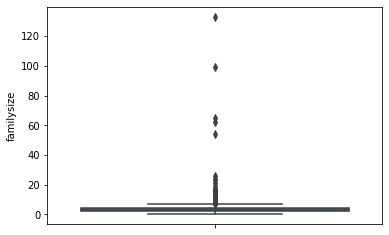

In [45]:
sns.boxplot(data=df,y='familysize')
plt.show()

Hardly believe familysizes should be more than 20 - this is how many children your mother had....
for familysize larger than 15, replace the values with the mean and run the boxplot again

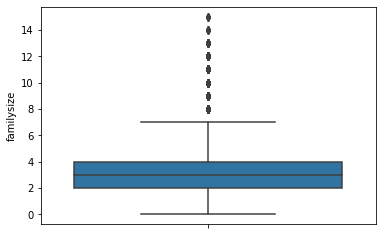

In [46]:
df.loc[df['familysize'] > 15, 'familysize'] = df['familysize'].mean()
sns.boxplot(data=df,y='familysize')
plt.show()

In [47]:
df['familysize'].value_counts()

3.000000     9195
2.000000     9012
4.000000     7532
5.000000     4826
1.000000     2940
6.000000     2448
7.000000     1243
0.000000     1125
8.000000      675
9.000000      331
10.000000     194
11.000000     109
12.000000      56
13.000000      19
3.510381       18
14.000000       8
15.000000       6
Name: familysize, dtype: int64

familysize should be at least 1 (the person taking the survey)

In [48]:
def update_col(col_name,st_val,end_val):
    df[col_name].replace(st_val,end_val,inplace=True)
    return

In [49]:
update_col('familysize',0,1)

familysize was a float - changing it to int to combine familysize of 3 (which was the mean inserted into the ones that had a value greater than 15)

In [50]:
df[["familysize"]] = df[["familysize"]].astype(int)
df['familysize'].value_counts()

3     9213
2     9012
4     7532
5     4826
1     4065
6     2448
7     1243
8      675
9      331
10     194
11     109
12      56
13      19
14       8
15       6
Name: familysize, dtype: int64

Check the remaining columns to ensure values are within range expected.

In [51]:
df['engnat'].value_counts()

2    25314
1    14371
0       52
Name: engnat, dtype: int64

In [52]:
update_col('engnat',0,2) # valid values are 1,2 replacing 0 with 2 (English not native language)

In [53]:
df['gender'].value_counts()

2    30337
1     8781
3      552
0       67
Name: gender, dtype: int64

In [54]:
update_col('gender',0,3) # valid values are 1,2,3 changing 0 to 3 (other) 

In [55]:
df['education'].value_counts()

3    15101
2    15062
4     4994
1     4065
0      515
Name: education, dtype: int64

In [56]:
update_col('education',0,1) # valid values are 1,2,3,4 changing 0 to 1 (less than high school)

In [57]:
df['urban'].value_counts()

3    17828
2    13222
1     8305
0      382
Name: urban, dtype: int64

In [58]:
update_col('urban',0,1) # valid values are 1,2,3 changing 0 to 1 (Rural)

In [59]:
df['hand'].value_counts()

1    34710
2     4166
3      688
0      173
Name: hand, dtype: int64

In [60]:
update_col('hand',0,1) # valid values are 1,2,3 changing 0 to 3 (both)

In [61]:
df['religion'].value_counts()

10    22050
2      3844
1      3242
4      3094
7      2253
12     1804
6      1539
8       699
3       526
0       356
9       144
5       122
11       64
Name: religion, dtype: int64

In [62]:
df['orientation'].value_counts()


1    24248
2     5001
5     3458
0     3105
4     1971
3     1954
Name: orientation, dtype: int64

In [63]:
update_col('orientation',0,5) # valid values are 1-5, changing to 5 (other)

In [64]:
df['race'].value_counts()

10    23081
60    10649
70     4829
30      603
20      333
50      220
40       22
Name: race, dtype: int64

In [65]:
df['voted'].value_counts()

2    28374
1    11036
0      327
Name: voted, dtype: int64

In [66]:
update_col('voted',0,2) # valid values are 1,2 changing to 2 (No)

In [67]:
df['married'].value_counts()

1    34100
2     4351
3     1091
0      195
Name: married, dtype: int64

In [68]:
update_col('married',0,1) # valid values are 1,2,3 changing to 1 (Never married)

In [69]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)


country    541
dtype: int64

Still need to deal with nulls in country - will replace with country used most often

In [70]:
df['country'].value_counts()

MY    21581
US     8204
GB     1180
CA      975
ID      882
      ...  
IM        1
AW        1
SR        1
CW        1
VC        1
Name: country, Length: 144, dtype: int64

In [71]:
update_col('country',np.nan,'MY')

In [72]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [73]:
df['country'].value_counts()

MY    22122
US     8204
GB     1180
CA      975
ID      882
      ...  
IM        1
AW        1
SR        1
CW        1
VC        1
Name: country, Length: 144, dtype: int64

In [74]:
df.head()

,country,tipi1,tipi2,tipi3,tipi4,tipi5,tipi6,tipi7,tipi8,tipi9,...,major,Depression,Depression_cat,Anxiety,Anxiety_cat,Stress,Stress_cat,dep_cond,anx_cond,str_cond
0,IN,1,5,7,7,7,7,7,5,1,...,No Degree,27,3,34,4,40,4,3 Severe,4 Extremely Severe,4 Extremely Severe
1,US,6,5,4,7,5,4,7,7,1,...,No Degree,24,3,17,3,27,3,3 Severe,3 Severe,3 Severe
2,PL,2,5,2,2,5,6,5,5,3,...,No Degree,39,4,12,2,17,1,4 Extremely Severe,2 Moderate,1 Mild
3,US,1,1,7,4,6,4,6,1,6,...,Biology,16,2,17,3,16,1,2 Moderate,3 Severe,1 Mild
4,MY,2,5,3,6,5,5,5,6,3,...,Psychology,32,4,40,4,29,3,4 Extremely Severe,4 Extremely Severe,3 Severe


Write the dataframe out to a csv file to be used by the ETL process.

In [75]:
df.to_csv("dass.csv", index=False)